<a href="https://colab.research.google.com/github/anushka4408/Covid-xrayimageClassification/blob/main/Covid_xray_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='anushka4408'
os.environ['KAGGLE_KEY']='01778011259d36b824338970042b5ffc'

In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database


Dataset URL: https://www.kaggle.com/datasets/tawsifurrahman/covid19-radiography-database
License(s): copyright-authors
covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [ ]:
import cv2

In [ ]:
img=cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-1.png')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random


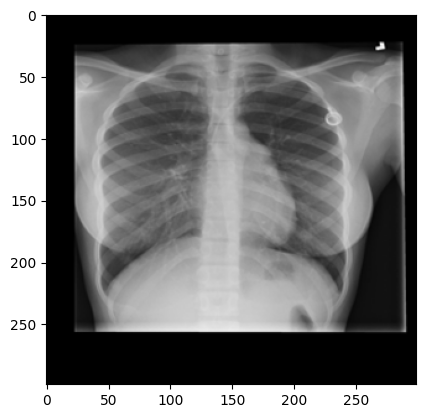

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

In [ ]:
import pandas as pd
df=pd.read_excel('COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [ ]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
df.shape

(3616, 4)

In [ ]:
df.describe()

,FILE NAME,FORMAT,SIZE,URL
count,3616,3616,3616,3616
unique,3616,1,1,6
top,COVID-3600,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
freq,1,3616,3616,2474


In [ ]:
# Define the image size and number of images per class
IMG_SIZE = (299, 299)
SAMPLE_SIZE = 100  # Choose 100 images per class

In [ ]:
urls= os.listdir('COVID-19_Radiography_Dataset/COVID/images')

In [ ]:
path='COVID-19_Radiography_Dataset/COVID/images/'+urls[0]

In [ ]:
path

'COVID-19_Radiography_Dataset/COVID/images/COVID-1207.png'

In [ ]:
# Function to load a limited number of images
def loadImages(path, sample_size, target):
    images = []
    labels = []
    all_images = os.listdir(path)

    # Randomly select 'sample_size' images
    selected_images = random.sample(all_images, sample_size)

    for img_name in selected_images:
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, IMG_SIZE)  # Resize to 299x299
            img = img / 255.0  # Normalize pixels
            images.append(img)
            labels.append(target)

    return np.array(images), np.array(labels)

In [ ]:
# Load COVID images (100 samples)
covid_path = 'COVID-19_Radiography_Dataset/COVID/images'
covid_images, covid_labels = loadImages(covid_path, SAMPLE_SIZE, 1)

In [ ]:
# Load Normal images (100 samples)
normal_path = 'COVID-19_Radiography_Dataset/Normal/images'
normal_images, normal_labels = loadImages(normal_path, SAMPLE_SIZE, 0)

In [ ]:
# Combine datasets
data = np.vstack((covid_images, normal_images))
labels = np.concatenate((covid_labels, normal_labels))

In [ ]:
print(f"Dataset shape: {data.shape}, Labels shape: {labels.shape}")

Dataset shape: (200, 299, 299, 3), Labels shape: (200,)


In [ ]:
# Shuffle dataset
from sklearn.utils import shuffle
data, labels = shuffle(data, labels, random_state=42)


In [ ]:
# def loadImages(path,urls,target):
#   images=[]
#   labels=[]
#   for i in range(len(urls)):
#     img_path=path+'/'+urls[i]
#     img=cv2.imread(img_path)
#     img=img/255.0
#     # cv2.resize(img,(100,100))
#     images.append(img)
#     labels.append(target)
#   images=np.asarray(images)
#   return images,labels


In [ ]:
# covid_path='COVID-19_Radiography_Dataset/COVID/images'
# covid_urls=os.listdir(covid_path)
# covidImages,covidTargets=loadImages(covid_path,covid_urls,1)

In [ ]:
# normal_path='COVID-19_Radiography_Dataset/Normal/images'
# normal_urls=os.listdir(normal_path)
# normalImages,normalTargets=loadImages(normal_path,normal_urls,0)

In [ ]:
# covidImages=np.asarray(covidImages)
# normalImages=np.asarray(normalImages)


In [ ]:
# covidImages.shape

(3616, 299, 299, 3)

In [ ]:
# normalImages.shape

(10192, 299, 299, 3)

In [ ]:
# data=np.r_[covidImages,normalImages]

In [ ]:
# data.shape

(13808, 299, 299, 3)

In [ ]:
# targets=np.r_[covidTargets,normalTargets]

In [ ]:
# targets.shape

(13808,)

In [ ]:
# data=data/255.0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.25)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images by 20 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2, # Shift height by 20%
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Flip images horizontally
    fill_mode='nearest'     # Fill in missing pixels
)

# Fit the generator on training data
datagen.fit(x_train)


In [ ]:
model = Sequential([
    # First Conv Layer
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(299, 299, 3)),
    MaxPooling2D(pool_size=(2,2)),

    # Second Conv Layer
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2,2)),

    # Third Conv Layer
    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),  # Flatten feature maps

    # Fully Connected Layer with Dropout
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting

    # Output Layer (Binary Classification: COVID or Normal)
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 297, 297, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 148, 148, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 156800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      20,070,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,163,905 (76.92 MB)

 Trainable params: 20,163,905 (76.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# model=Sequential([
#     Conv2D(32,(3,3),activation='relu',input_shape=(299,299,3)),
#     MaxPooling2D((2,2)),
# ])

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=16),
                    validation_data=(x_test, y_test),
                    epochs=20,
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - accuracy: 0.4882 - loss: 1.5398 - val_accuracy: 0.5200 - val_loss: 0.7942
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.3697 - loss: 0.8053 - val_accuracy: 0.5200 - val_loss: 0.7732
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.5137 - loss: 0.7733 - val_accuracy: 0.5200 - val_loss: 0.7577
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5005 - loss: 0.7659 - val_accuracy: 0.5600 - val_loss: 0.7460
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6218 - loss: 0.7245 - val_accuracy: 0.4800 - val_loss: 0.7749
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.5247 - loss: 0.7367 - val_accuracy: 0.6200 - val_loss: 0.7274
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6244 - loss: 0.7320 - val_accuracy: 0.6400 - val_loss: 0.7239
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6673 - loss: 0.7030 - val_accuracy: 0.6400 - val_loss:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.6513 - loss: 0.7283
Test Accuracy: 68.00%


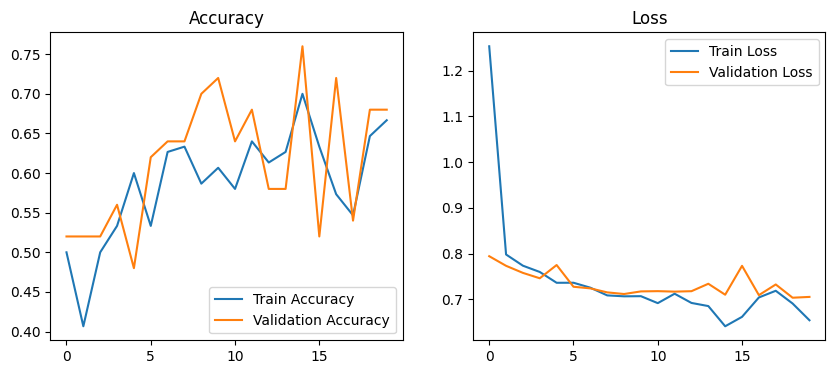

In [ ]:

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
